In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Check the structure of the dataset
feature_names = data.feature_names
df = pd.DataFrame(data=np.c_[X, y], columns=feature_names + ['target'])
print(df.head())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Handle missing values using imputation
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Identify and handle outliers (using Z-score as an example)
z_scores = np.abs((X_imputed - X_imputed.mean(axis=0)) / X_imputed.std(axis=0))
outlier_mask = (z_scores > 3).any(axis=1)

# Remove outliers
X_no_outliers = X_imputed[~outlier_mask]
y_no_outliers = y[~outlier_mask]

# Print the shapes after handling missing values and outliers
print("Shape before handling missing values:", X.shape)
print("Shape after imputation:", X_imputed.shape)
print("Shape after handling outliers:", X_no_outliers.shape)


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
Missing values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64
Shape before handling missing values: (20640, 8)
Shape after imputation: (20640, 8)
Shape after handling outliers: (19794, 8)


In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (15835, 8)
Shape of X_test: (3959, 8)
Shape of y_train: (15835,)
Shape of y_test: (3959,)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model on the training set
linear_reg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_linear_reg = linear_reg_model.predict(X_test)

# Evaluate the model's performance
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

print("MSE-",mse_linear_reg)
print("R2-",r2_linear_reg)

MSE- 0.4731016254420803
R2- 0.6162271478185652


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the ANN model
ann_model = Sequential()

# Design the architecture of the neural network
ann_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
ann_model.add(Dense(units=1, activation='linear'))

# Compile the model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the training set
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the testing set
y_pred_ann = ann_model.predict(X_test)

# Evaluate the model's performance
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)


Epoch 1/50
516/516 [==============================] - 2s 2ms/step - loss: 857.9794 - val_loss: 1.1955
Epoch 2/50
516/516 [==============================] - 1s 2ms/step - loss: 0.8951 - val_loss: 0.6968
Epoch 3/50
516/516 [==============================] - 1s 2ms/step - loss: 0.7033 - val_loss: 0.7286
Epoch 4/50
516/516 [==============================] - 1s 2ms/step - loss: 0.6657 - val_loss: 0.6787
Epoch 5/50
516/516 [==============================] - 1s 2ms/step - loss: 0.8014 - val_loss: 1.9144
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 1.5676 - val_loss: 0.6970
Epoch 7/50
516/516 [==============================] - 1s 2ms/step - loss: 1.0375 - val_loss: 0.6394
Epoch 8/50
516/516 [==============================] - 1s 2ms/step - loss: 2.4928 - val_loss: 0.7907
Epoch 9/50
516/516 [==============================] - 1s 2ms/step - loss: 1.1745 - val_loss: 7.6934
Epoch 10/50
516/516 [==============================] - 1s 2ms/step - loss: 2.6137 - val_loss: 0.78

In [5]:
print("Linear Regression Metrics:")
print("Mean Squared Error:", mse_linear_reg)
print("R2 Score:", r2_linear_reg)

print("\nANN Metrics:")
print("Mean Squared Error:", mse_ann)
print("R2 Score:", r2_ann)


Linear Regression Metrics:
Mean Squared Error: 0.555891598695242
R2 Score: 0.5757877060324526

ANN Metrics:
Mean Squared Error: 1.3852150490853212
R2 Score: -0.057086048772988285


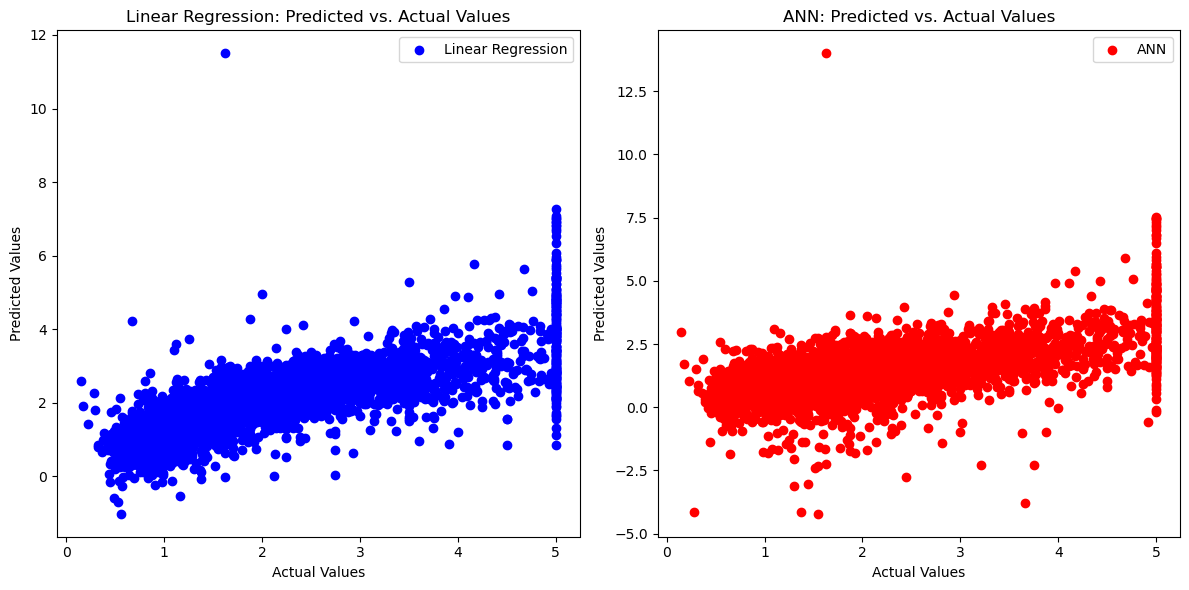

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear_reg, color='blue', label='Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs. Actual Values')
plt.legend()

# Scatter plot for ANN
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ann, color='red', label='ANN')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('ANN: Predicted vs. Actual Values')
plt.legend()

plt.tight_layout()
plt.show()
